In [3]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
from pydataset import data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn import datasets, metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [4]:
#Loading Dataset with relative path
ed = pd.read_csv('energydata_complete.csv')
ed

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
#Data Pre-Processing
def myPreProc(ed):
    procData = ed.dropna(how = 'all', axis = 1, inplace = False)
    procData = procData.dropna() 
    procData['Power'] = procData['Appliances'].astype(int) + procData['lights'].astype(int)
    procData = procData.drop('Appliances', axis = 1);
    procData = procData.drop('lights', axis = 1);
    procData = procData.drop('rv1', axis = 1);
    procData = procData.drop('rv2', axis = 1);
    procData = procData.drop('date', axis = 1);
    return procData
procData = myPreProc(ed)
procData.isna().sum();
procData

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Power
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,90
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,90
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,80
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,90
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,...,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,100
19731,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,...,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,90
19732,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,...,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,280
19733,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,...,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,430


In [6]:
#Splitting of Data
X = procData.drop('Power', axis=1)
y = y=procData['Power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [7]:
knn_model=KNeighborsRegressor()
knn_model.fit(X_train,y_train)

KNeighborsRegressor()

In [8]:
#Training Metrics
y_train_pred = knn_model.predict(X_train)
print('The training R_square is: %.2f'% r2_score(y_train, y_train_pred))
print('The MAE is:%2.f'%mean_absolute_error(y_train, y_train_pred))
print('MSE is: %2.f'%mean_squared_error(y_train, y_train_pred))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_train, y_train_pred)))

The training R_square is: 0.63
The MAE is:30
MSE is: 3940
The RMSE is: 63


In [9]:
#Testing Metrics
y_test_pred = knn_model.predict(X_test)
print('The testing R_square is: %.2f'% r2_score(y_test, y_test_pred))
print('The MAE is:%2.f'%mean_absolute_error(y_test, y_test_pred))
print('MSE is: %2.f'%mean_squared_error(y_test, y_test_pred))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_test, y_test_pred)))

The testing R_square is: 0.41
The MAE is:39
MSE is: 6594
The RMSE is: 81


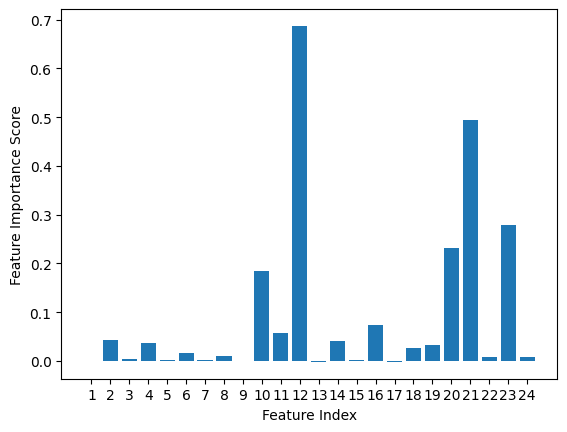

In [10]:
#Plotting Permutation Importance scores
from sklearn.inspection import permutation_importance

result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
feature_importance_scores = result.importances_mean

plt.bar(range(X_test.shape[1]), feature_importance_scores)
plt.xticks(range(X_test.shape[1]), np.arange(X_test.shape[1])+1)
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Index')
plt.show()

Considering the Feature importance plot and the feature importance scores the scores are ranging from 0.1 to 0.7 which doesn't exactly showcase a major leap in importance. Considering around 60% of all features are under 0.1 it was decided that all features can be kept.

In [11]:
#Test Train Split and Standardization of data
X = procData.drop('Power', axis=1)
y = y=procData['Power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [12]:
# Fitting model for Standardised data
knn_model_std=KNeighborsRegressor()
knn_model_std.fit(X_train_std,y_train)

KNeighborsRegressor()

In [13]:
#Standardised model's training metrics
y_train_pred_std = knn_model_std.predict(X_train_std)
print('The training R_square is: %.2f'% r2_score(y_train, y_train_pred_std))
print('The MAE is:%2.f'%mean_absolute_error(y_train, y_train_pred_std))
print('MSE is: %2.f'%mean_squared_error(y_train, y_train_pred_std))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_train, y_train_pred_std)))

The training R_square is: 0.67
The MAE is:27
MSE is: 3594
The RMSE is: 60


In [14]:
#Standardised model's testing metrics
y_test_pred_std = knn_model_std.predict(X_test_std)
print('The testing R_square is: %.2f'% r2_score(y_test, y_test_pred_std))
print('The MAE is:%2.f'%mean_absolute_error(y_test, y_test_pred_std))
print('MSE is: %2.f'%mean_squared_error(y_test, y_test_pred_std))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_test, y_test_pred_std)))

The testing R_square is: 0.48
The MAE is:35
MSE is: 5555
The RMSE is: 75


In [15]:
#input of possible best parameters
n_neighbors = [3,5,6,11,15]
leaf_size = [25,40,50]
metric = ['euclidean', 'manhattan', 'minkowski']

Though there is no rule regarding selection of possible values, common practice has shown that selecting odd numbers is preferred, though this is not a classification problem the same has been followed after trying with other possible variations.
Taking upto k=21 also seems to be a general practice.

Deafault values are as follows: 
leaf_size, default=30
n_neighbors default is 5

In [16]:
#Creating Parameter Grid
param_grid = {'n_neighbors':n_neighbors,
             'leaf_size':leaf_size,
             'metric':metric}
print(param_grid)

{'n_neighbors': [3, 5, 6, 11, 15], 'leaf_size': [25, 40, 50], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [17]:
#Fitting for best parameters
grid_knn_model = KNeighborsRegressor()
knn_Grid = GridSearchCV(estimator = grid_knn_model, param_grid =param_grid, cv=5, verbose=0)
knn_Grid.fit(X_train_std,y_train)
knn_Grid.best_params_

{'leaf_size': 25, 'metric': 'manhattan', 'n_neighbors': 3}

In [18]:
#Hyperparameter tuned training metrics
y_train_pred_grid = knn_Grid.predict(X_train_std)
print('The training R_square is: %.2f'% r2_score(y_train, y_train_pred_grid))
print('The MAE is:%2.f'%mean_absolute_error(y_train, y_train_pred_grid))
print('MSE is: %2.f'%mean_squared_error(y_train, y_train_pred_grid))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_train, y_train_pred_grid)))

The training R_square is: 0.81
The MAE is:20
MSE is: 2058
The RMSE is: 45


In [19]:
#Hyperparameter tuned testing metrics
y_test_pred_grid = knn_Grid.predict(X_test_std)
print('The testing R_square is: %.2f'% r2_score(y_test, y_test_pred_grid))
print('The MAE is:%2.f'%mean_absolute_error(y_test, y_test_pred_grid))
print('MSE is: %2.f'%mean_squared_error(y_test, y_test_pred_grid))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_test, y_test_pred_grid)))

The testing R_square is: 0.58
The MAE is:30
MSE is: 4477
The RMSE is: 67


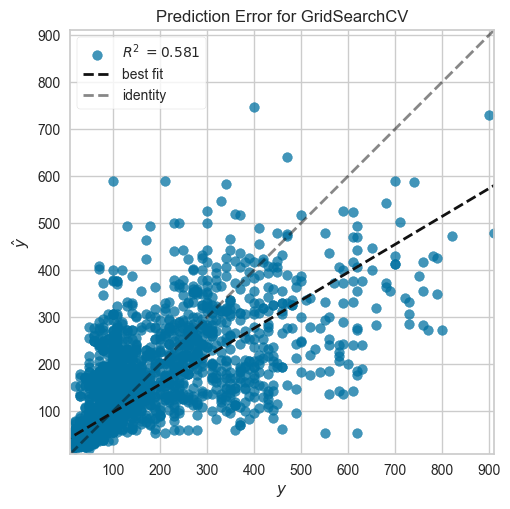

<AxesSubplot: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [20]:
# Plotting Prediction errors using Yellowbrick
from yellowbrick.regressor import PredictionError
visualiser = PredictionError(knn_Grid)
visualiser.fit(X_train_std, y_train)
visualiser.score(X_test_std, y_test)
visualiser.poof()

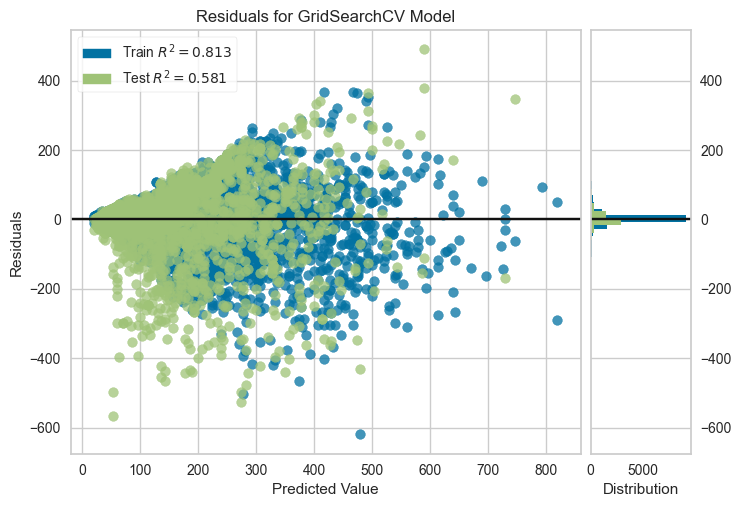

<AxesSubplot: title={'center': 'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [21]:
from yellowbrick.regressor import ResidualsPlot
visualiser = ResidualsPlot(knn_Grid)
visualiser.fit(X_train_std, y_train)
visualiser.score(X_test_std, y_test)
visualiser.poof()

In [22]:
import time
start = time.time()
grid_knn_model.fit(X_train_std, y_train)
y_pred = grid_knn_model.predict(X_test_std)
stop = time.time()
Execution_time = (stop - start) * 1000
print("Execution time: {:.2f} milliseconds".format(Execution_time))

Execution time: 143.06 milliseconds
